In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from timeit import default_timer as timer

# Задача #1

###### Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [12]:
def num(b, n, r):
    for i in range(10):
        if (b[i] >= r):
            return(n[i])

0.0027550000000928776


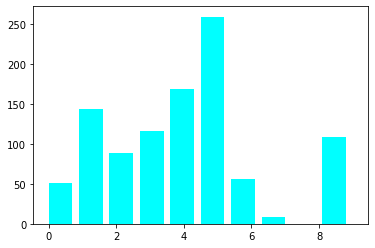

In [13]:
w = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
w = w/w.sum()
b = np.array([w[:i+1].sum() for i in range(10)])
n = np.arange(10)

time1=timer()
random = np.array([num(b, n, np.random.rand()) for i in range(1000)])
time2=timer()  
    
print(time2-time1)
    
plt.hist(random, width = 0.7, color = 'cyan')
plt.show()

0.0038332999999965978


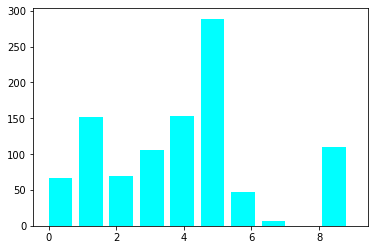

In [14]:
w = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
w = w/w.sum()
n = np.arange(10)
n = w.argsort()[::-1]
w.sort()
w=w[::-1]
b = np.array([w[:i+1].sum() for i in range(10)])


time1=timer()
random = np.array([num(b, n, np.random.rand()) for i in range(1000)])
time2=timer()  
    
print(time2-time1)
    
plt.hist(random, width = 0.7, color = 'cyan')
plt.show()

# Задача #2

###### Смоделируйте выборку размера 1000 из распределения  𝐸𝑥𝑝(𝜆) . Постройте выборочную гистограмму и точный график плотности распределения.

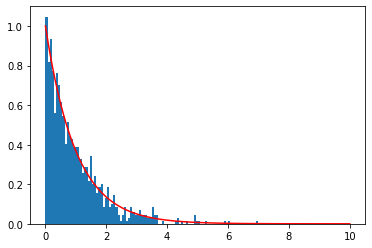

In [39]:
X = np.linspace(0, 10, 100)
Y = np.exp(-X)

random = np.array([np.log(1/(1-np.random.rand())) for i in range(1000)]);
plt.hist(random, bins=100, density=True)
plt.plot(X, Y, color = 'red')
plt.show()

# Задача #3

###### Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

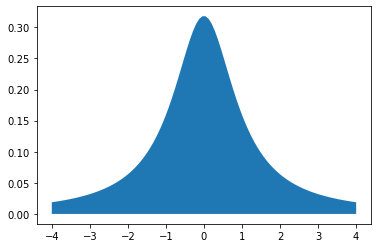

In [40]:
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

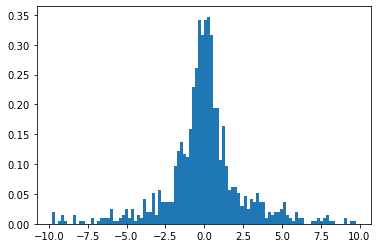

In [46]:
data = np.zeros(1000)
for i in range(1000):
    a = 20*np.random.rand() - 10
    b = (1/3)*np.random.rand()
    while (b > stats.cauchy.pdf(a)):
        a = 20*np.random.rand() - 10
        b = (1/3)*np.random.rand()
    data[i] = a
plt.hist(data, bins=100, density=True)
plt.show()

# Задача #4

###### Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

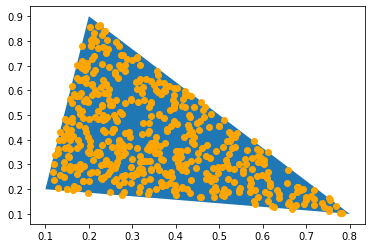

In [79]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

a = np.array([np.random.rand() for i in range(500)])
b = np.array([np.random.rand() for i in range(500)])

x = 1+1*a+7*b
y = 2+7*a-b

for i in range(500):
    if (y[i]>(-4/3)*x[i]+35/3):
        x[i] = 1 - (x[i] - 9)
        y[i] = 2 - (y[i] - 8)

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(x/10, y/10, color = 'orange')
plt.show()

# Задача #5

###### Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

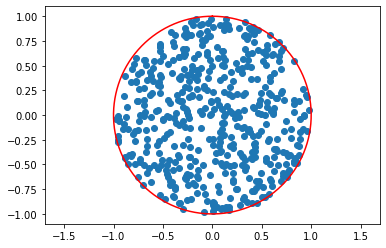

In [80]:
r=np.sqrt([np.random.rand() for i in range(500)])
a=np.array([np.random.rand() for i in range(500)])*2*np.pi
plt.scatter(r*np.cos(a),r*np.sin(a))

teta = np.linspace(0, 2 * np.pi, 1000)
plt.plot(np.sin(teta), np.cos(teta), c = 'red')

plt.axis('equal')
plt.show()

# Задача #6

###### Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

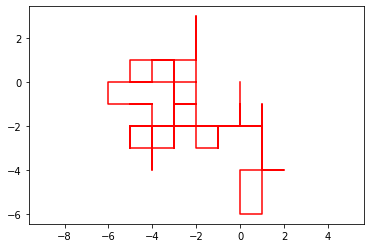

In [92]:
data = np.zeros([2, 101])
t = np.array([np.random.randint(0,2) for i in range(50)])
updo = len(t[t==0])*2
updowns = np.random.choice(np.arange(100), updo, replace = False) + 1
updowns.sort()
ups = np.random.choice(updowns, updo//2, replace = False)
ups.sort()
data[1, ups] = 1
data[1, updowns] = data[1, updowns]*2 - 1
leftrights = np.arange(100)[data[1, 1:]==0] + 1
lefts = np.random.choice(leftrights, 50 - ud//2, replace = False)
data[0, lefts] = -1
data[0, leftrights] = data[0, leftrights]*2 + 1
for i in range(101):
    data[0, -i-1] += data[0, :-i-1].sum()
    data[1, -i-1] += data[1, :-i-1].sum()
plt.plot(data[0], data[1], c = 'red')
plt.axis('equal')
plt.show()

# Задача #7

##### Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

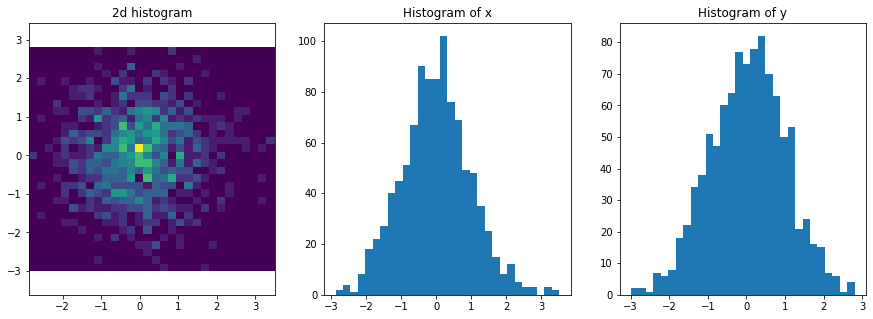

In [100]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

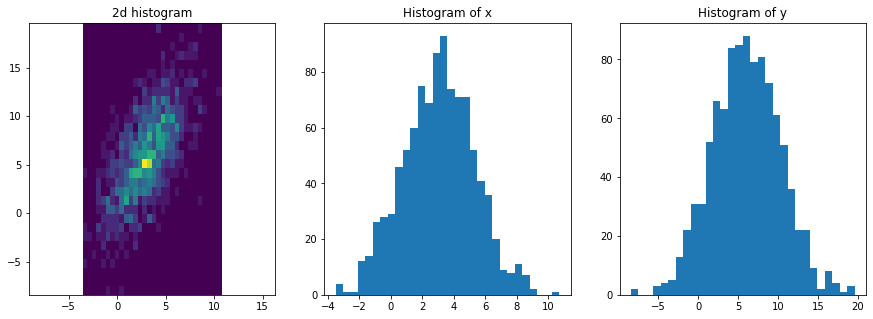

In [113]:
n = 1000
u1, u2 = np.random.rand(2, n)*2 - 1
for i in range(n):
    while u1[i]**2+u2[i]**2 > 1:
        u1[i], u2[i]=np.random.rand(2)*2 - 1
mod = u1**2+u2**2
lx = u1 * np.sqrt(-2*np.log(mod)/mod)
x = lx * 2 + ty + 3
ly = u2 * np.sqrt(-2*np.log(mod)/mod)
y = lx + ty * 4 + 6
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

# Задача #8

##### Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [114]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

In [128]:
from scipy.linalg import sqrtm
a = np.zeros([9,10000])
for i in range(10000):
    a[:, i] = np.random.normal(0, 1, 9)
print((sqrtm(B).imag > 10e-5).any())
c = np.matmul(sqrtm(B).real, a)
print(abs(np.cov(c) - B) < 10e-1)

False
[[ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]]


# Задача #9

##### С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  𝜋 . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  𝜋  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

# Задача #10

##### Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [132]:
q = 1
a = np.zeros(100)
for i in range(100):
    a[i] = np.random.randint(0, q)
    if a[i] == q-1:
        q += 1
print(a)
print(q)

exp = 0;
for j in range(1000):
    q = 1
    a = np.zeros(100)
    for i in range(100):
        a[i] = np.random.randint(0, q)
        if a[i] == q-1:
            q += 1
    exp += q-1
print(exp / 1000)

[ 0.  0.  1.  1.  0.  1.  2.  3.  0.  2.  0.  2.  2.  1.  2.  3.  1.  0.
  3.  4.  2.  4.  2.  0.  4.  2.  1.  3.  4.  5.  2.  5.  6.  0.  0.  2.
  1.  7.  6.  1.  6.  8.  6.  9.  6.  8.  9.  2. 10.  8. 11.  0.  6.  5.
  3.  9.  9.  3.  9. 10.  3.  8.  1.  8.  3.  1. 12.  2. 13.  0.  2.  4.
  5. 13.  1.  3.  0. 14.  3. 11.  2.  9. 10.  9. 11.  2.  4.  6.  5. 10.
  1.  5.  6. 13.  2.  3.  8.  4.  0. 14.]
16
13.508
